In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression
%matplotlib inline

c:\users\odion\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
badass_train = pd.read_csv('../venv/TRAIN.csv')
badass_train.describe()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000
mean,1450.634286,48.354479,805.641729,30.394286,58.482293,2.162307e+06,202.422143,6814.392143,15730.42000,1.922143,0.500000
std,1276.008188,42.533536,1251.742068,60.885095,289.613589,6.865958e+06,302.036220,16707.784943,37448.94212,2.345515,0.500179
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.00000,1.000000,0.000000
25%,287.000000,9.567500,155.537500,2.620000,1.250000,1.384346e+03,18.000000,60.000000,1123.00000,1.000000,0.000000
50%,1171.000000,39.030000,606.575000,13.715000,11.250000,1.193487e+05,81.500000,1617.000000,4171.00000,1.000000,0.500000
75%,2242.000000,74.732500,1018.395500,31.205000,42.812500,1.206785e+06,254.250000,7177.750000,13151.50000,2.000000,1.000000
max,5451.000000,181.700000,24438.830000,873.980000,8295.000000,9.945640e+07,2596.000000,381174.000000,431440.00000,49.000000,1.000000


In [3]:
#badass.head(3)

In [4]:
badass_test = pd.read_csv('../venv/TEST.csv')
badass_test.describe()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls
count,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000
mean,1513.701667,50.456722,1136.902985,32.775350,59.561583,4.201155e+06,330.716667,8804.033333,18154.278333,1.930000
std,1311.496823,43.716561,828.916189,50.290467,91.981495,1.216901e+07,481.736778,15912.129544,25483.237987,2.069357
min,-8.000000,-0.266667,225.932800,0.000000,0.000000,1.211000e-01,1.000000,0.000000,0.000000,1.000000
25%,390.250000,13.008333,403.342500,5.250000,2.500000,1.889670e+04,45.750000,257.750000,2401.000000,1.000000
50%,1246.000000,41.533333,942.639600,17.940000,23.750000,4.653526e+05,152.000000,2526.500000,8096.500000,1.000000
75%,2256.250000,75.208333,1699.786000,39.715000,73.750000,2.433745e+06,470.250000,10688.500000,21142.750000,2.000000
max,5363.000000,178.766667,3491.134800,567.380000,748.750000,1.550312e+08,5727.000000,145839.000000,158521.000000,17.000000


In [5]:
badass_test.head(1)

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2
0,ADF0001,1012,33.733333,1560.1156,14.04,226.3,3126093.298,64,14503,12402,1,3G,3G,Weematel,Mango


In [6]:
badass_train.head(1)

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.1,76.714,0.0,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0


In [7]:
test=badass_test.copy()

In [8]:
train=badass_train.copy()

In [9]:
 train = train.drop(['Customer ID', 'Network type subscription in Month 1','Network type subscription in Month 2', 'Most Loved Competitor network in in Month 2'], axis=1)

In [10]:
train.head(1)

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Most Loved Competitor network in in Month 1,Churn Status
0,123.0,4.1,76.714,0.0,1.25,1.4951,14.0,564.0,6408.0,2.0,Uxaa,0.0


In [11]:
train = train.drop(['Most Loved Competitor network in in Month 1'], axis=1)

In [53]:
#train['Churn Status'].value_counts()
train['Churn Status'][train['Churn Status']== 0.5] = 1

In [60]:
train['Churn Status'].iloc[1400]

1.0

In [61]:
train['Churn Status'].value_counts()

1.0    701
0.0    700
Name: Churn Status, dtype: int64

In [62]:
train.corr()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
network_age,1.000000,1.000000,0.141220,-0.041783,0.042050,-0.060447,0.227427,0.014812,0.091307,0.065568,-0.124344
Customer tenure in month,1.000000,1.000000,0.141220,-0.041782,0.042052,-0.060446,0.227429,0.014811,0.091309,0.065568,-0.124343
Total Spend in Months 1 and 2 of 2017,0.141220,0.141220,1.000000,0.392617,0.666613,0.117119,0.576911,0.449974,0.745390,0.090060,-0.029714
Total SMS Spend,-0.041783,-0.041782,0.392617,1.000000,0.355067,-0.039586,0.077158,0.199500,0.274861,0.021247,0.098915
Total Data Spend,0.042050,0.042052,0.666613,0.355067,1.000000,0.093821,0.108656,0.162860,0.306024,0.076428,0.036300
Total Data Consumption,-0.060447,-0.060446,0.117119,-0.039586,0.093821,1.000000,-0.007480,-0.058577,0.004268,0.026101,-0.142295
Total Unique Calls,0.227427,0.227429,0.576911,0.077158,0.108656,-0.007480,1.000000,0.283850,0.518313,0.065637,-0.134285
Total Onnet spend,0.014812,0.014811,0.449974,0.199500,0.162860,-0.058577,0.283850,1.000000,0.488650,0.033637,-0.005008
Total Offnet spend,0.091307,0.091309,0.745390,0.274861,0.306024,0.004268,0.518313,0.488650,1.000000,0.044265,0.103182
Total Call centre complaint calls,0.065568,0.065568,0.090060,0.021247,0.076428,0.026101,0.065637,0.033637,0.044265,1.000000,-0.071842


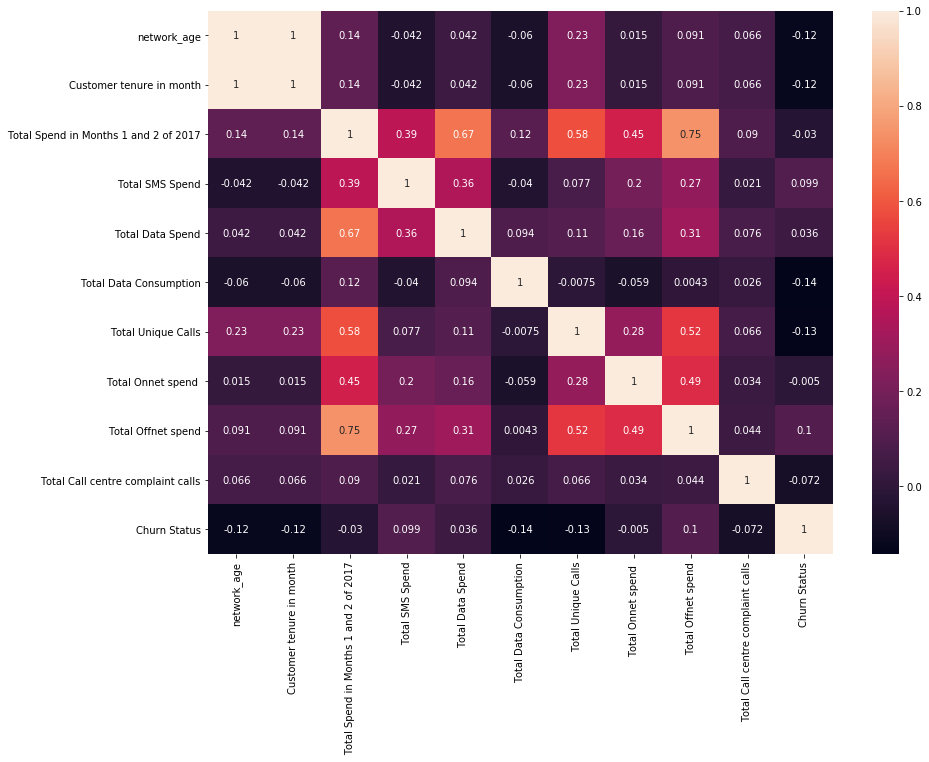

In [63]:
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A9191CB00>,
      dtype=object)

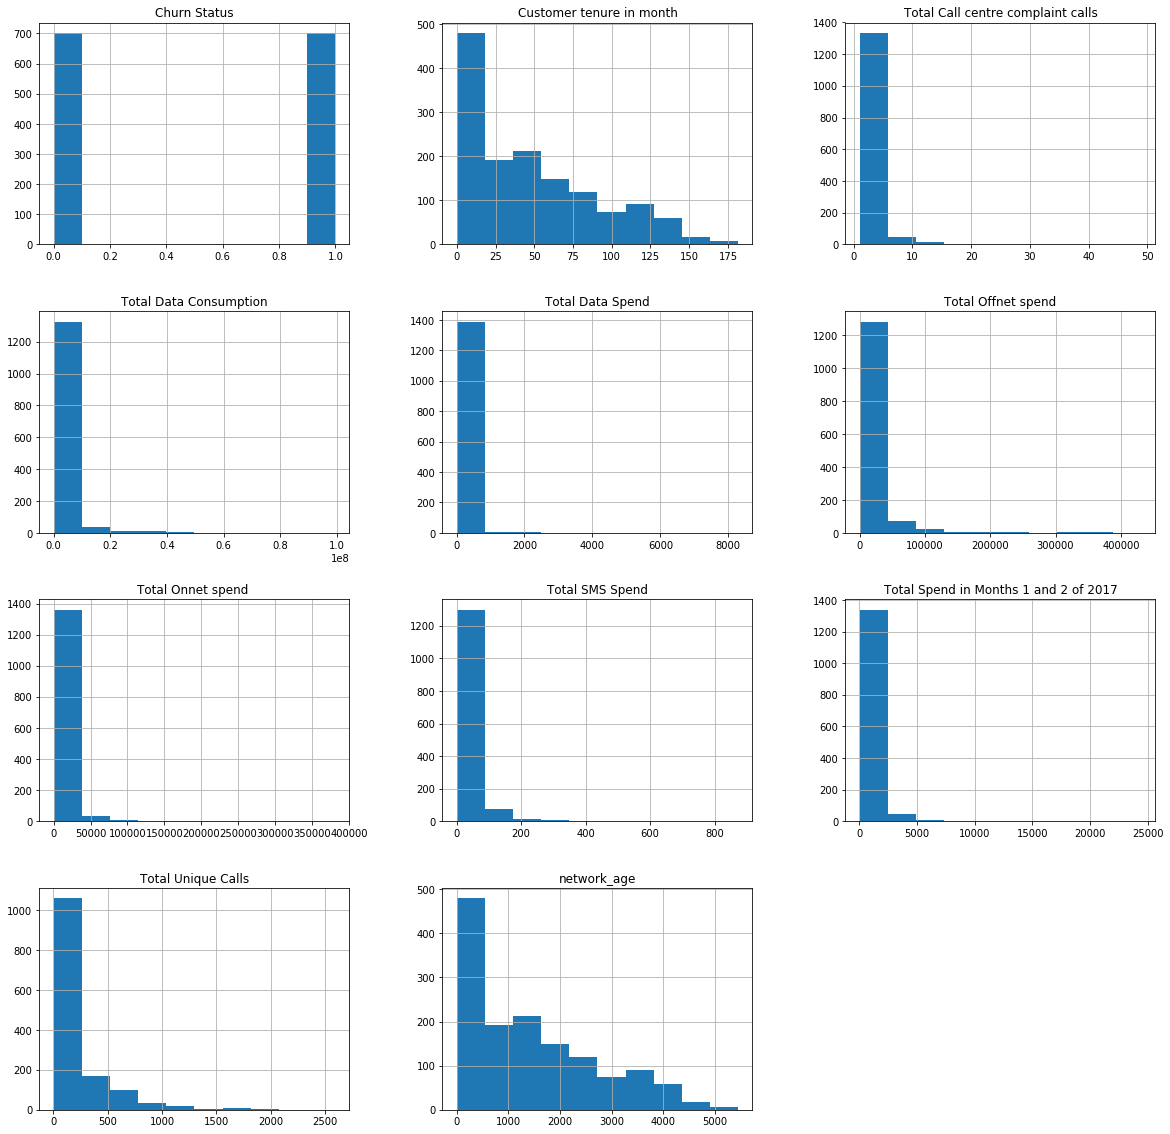

In [64]:
train.hist(figsize=(20,20))

In [65]:
#tain = train.drop(['Most Loved Competitor network in in Month 1'], axis=1)

In [69]:
train.isnull().sum()

network_age                              0
Customer tenure in month                 0
Total Spend in Months 1 and 2 of 2017    0
Total SMS Spend                          0
Total Data Spend                         0
Total Data Consumption                   0
Total Unique Calls                       0
Total Onnet spend                        0
Total Offnet spend                       0
Total Call centre complaint calls        0
Churn Status                             0
dtype: int64

In [70]:
train.head(1)

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
0,123.0,4.1,76.714,0.0,1.25,1.4951,14.0,564.0,6408.0,2.0,0.0


In [71]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='median')
imp.fit(train)
train = pd.DataFrame(data=imp.transform(train), columns=train.columns)

In [72]:
train.head(2)

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
0,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,0.0
1,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,0.0


In [73]:
x = train.drop(['Churn Status'], axis=1)
y=train['Churn Status']

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 11 columns):
network_age                              1401 non-null float64
Customer tenure in month                 1401 non-null float64
Total Spend in Months 1 and 2 of 2017    1401 non-null float64
Total SMS Spend                          1401 non-null float64
Total Data Spend                         1401 non-null float64
Total Data Consumption                   1401 non-null float64
Total Unique Calls                       1401 non-null float64
Total Onnet spend                        1401 non-null float64
Total Offnet spend                       1401 non-null float64
Total Call centre complaint calls        1401 non-null float64
Churn Status                             1401 non-null float64
dtypes: float64(11)
memory usage: 120.5 KB


In [75]:
x.head(1)

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls
0,123.0,4.1,76.714,0.0,1.25,1.4951,14.0,564.0,6408.0,2.0


In [76]:
y.value_counts()

1.0    701
0.0    700
Name: Churn Status, dtype: int64

In [77]:
from sklearn.cross_validation import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, train_size=0.4)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [82]:
y_pred_1 = knn.predict(x_train)
accuracy_score(y_pred_1, y_train,)

0.7660714285714286

In [29]:
#print(((y_pred_2 !=0.) & (y_pred_2 !=1.).any()))

In [35]:
#def remove_unlabelled_data(x,y):
 #   drop_indexes = x_test(y_test['score'] != 1) & (y_test['score'] != 0).index
  #  return x_test.drop(drop_indexes), y_test.drop(drop_indexes)

In [84]:
y_pred_2 =knn.predict(x_test)
accuracy_score(y_pred_2.round(), y_test, normalize=True)

0.6135552913198573

In [85]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_model = model.predict(x_test)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.5077288941736029

In [90]:
y_model_1 = model.predict(x_train)
accuracy_score(y_train, y_model_1)

0.5482142857142858

Text(83.4,0.5,'true value')

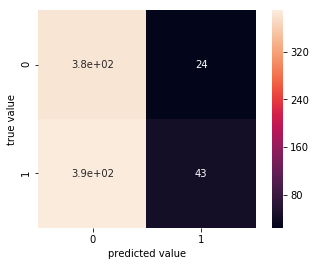

In [88]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [40]:
y_test.sample(10)

1192    1.0
49      1.0
390     0.0
593     0.0
4       0.0
674     0.0
870     1.0
924     0.0
1322    0.0
301     1.0
Name: Churn Status, dtype: float64

# Behaviors to retain customers

The best behaviour to retain customer in these situation is to give the customer value in return of the money spent on sms,data and calls.